In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
from scipy import stats

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load Data

In [6]:
data = pd.read_csv('twitchdata-update.csv')

In [7]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


### Exploratory Data Analysis

#### Check String Values

In [8]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

#### Check Null Values

In [9]:
data.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

#### Visualization

#### 1. Heatmap

In [10]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [8]:
vis_data = data.drop(['Channel', 'Partnered', 'Mature', 'Language'], axis=1)
vis_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
0,6196161750,215250,222720,27716,3246298,1734810,93036735
1,6091677300,211845,310998,25610,5310163,1370184,89705964
2,5644590915,515280,387315,10976,1767635,1023779,102611607
3,3970318140,517740,300575,7714,3944850,703986,106546942
4,3671000070,123660,285644,29602,8938903,2068424,78998587


In [9]:
vis_corr = vis_data.corr()
vis_corr

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000


In [10]:
extracted = pd.DataFrame(vis_corr.loc['Followers gained']).transpose()
extracted

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.0,0.244297


In [11]:
extracted.to_csv('extracted_corr.csv', index=False)

<AxesSubplot:>

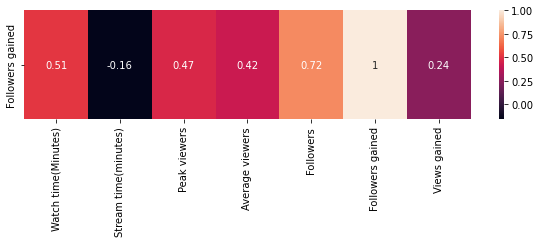

In [14]:
figure, ax = plt.subplots(figsize=(10,2))
sns.heatmap(ax=ax, data=extracted, annot=True)

**EDA Evaluation 1**
<br>The number of *Followers gained* have the highest correlation with the number of *Followers*, followed by the amount of *Watch time(Minutes)*. While, *Stream time(minutes)* is negatively correlated.

#### 2. Countplot

<AxesSubplot:xlabel='Partnered', ylabel='count'>

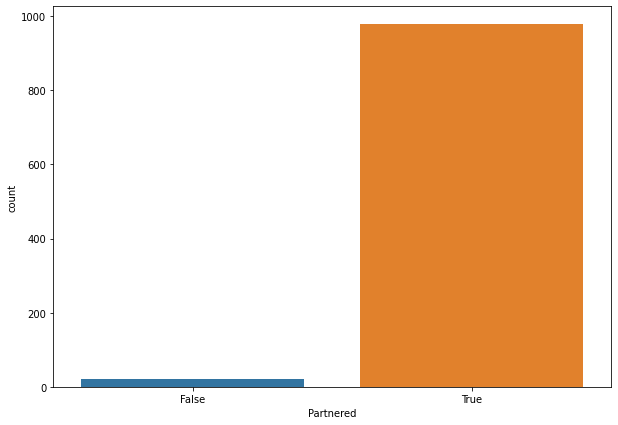

In [15]:
figure, ax = plt.subplots(figsize=(10,7))
sns.countplot(ax=ax, x=data['Partnered'])

In [16]:
partnered_true = len(data[data['Partnered']==True]['Partnered'])
partnered_false = len(data[data['Partnered']==False]['Partnered'])

partnered_percentage = (partnered_true / (partnered_true + partnered_false)) * 100

print(f"Partnered: {partnered_true}")
print(f"Partnered: {partnered_false}")
print(f"Partnered percentage: {partnered_percentage}")

Partnered: 978
Partnered: 22
Partnered percentage: 97.8


<AxesSubplot:xlabel='Mature', ylabel='count'>

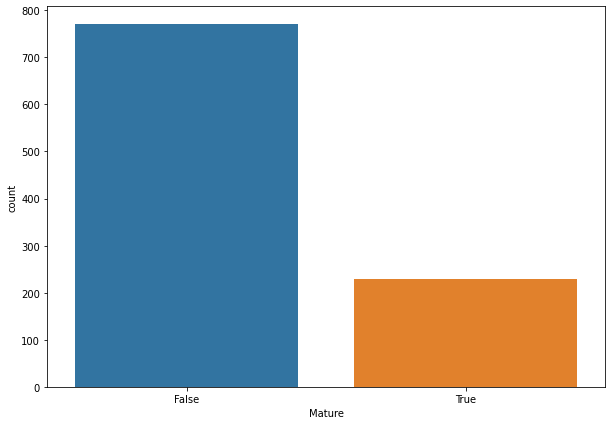

In [17]:
figure, ax = plt.subplots(figsize=(10,7))
sns.countplot(ax=ax, x=data['Mature'])

In [18]:
mature_true = len(data[data['Mature']==True]['Mature'])
mature_false = len(data[data['Mature']==False]['Mature'])

mature_percentage = (mature_true / (mature_true + mature_false)) * 100

print(f"Mature: {mature_true}")
print(f"Mature: {mature_false}")
print(f"Mature percentage: {mature_percentage}")

Mature: 230
Mature: 770
Mature percentage: 23.0


<AxesSubplot:xlabel='Language', ylabel='count'>

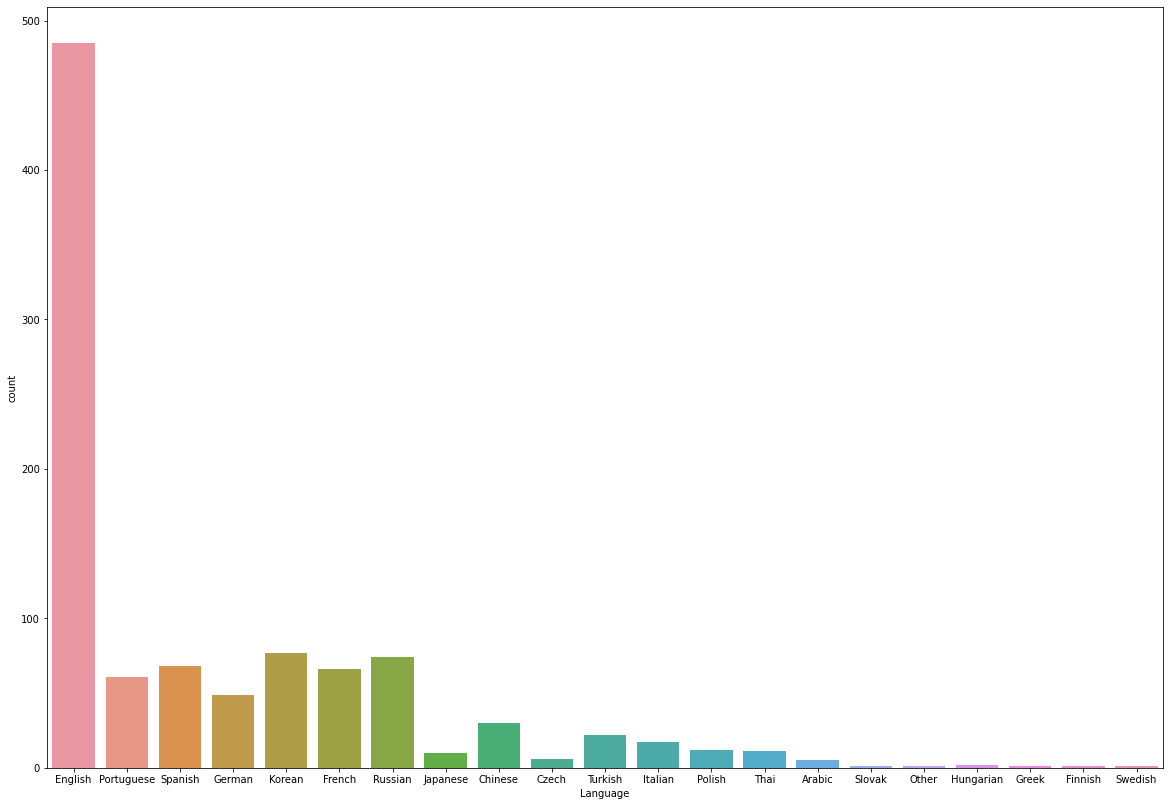

In [19]:
figure, ax = plt.subplots(figsize=(20,14))
sns.countplot(ax=ax, x=data['Language'])

In [20]:
english = len(data[data['Language']=='English']['Language'])
korean = len(data[data['Language']=='Korean']['Language'])
russian = len(data[data['Language']=='Russian']['Language'])
others = 1000-(english + korean + russian)

english_percentage = round((english / 1000) * 100, 1)
korean_percentage = round((korean / 1000) * 100, 1)
russian_percentage = round((russian / 1000) * 100, 1)
others_percentage = round((others / 1000) * 100, 1)

print(f"English percentage: {english_percentage}")
print(f"Korean percentage: {korean_percentage}")
print(f"Russian percentage: {russian_percentage}")
print(f"Others: {others_percentage}")

English percentage: 48.5
Korean percentage: 7.7
Russian percentage: 7.4
Others: 36.4


**EDA Evaluation 2**
<br>97.8 percent of the streamers are *Partnered*;
<br>23 percent of the streamers are *Mature*;
<br>The top 3 languages used by streamers are English(48.5 percent), Korean(7.7 percent), and Russian(7.4 percent), respectively.

### One-Hot Encoding

In [8]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [9]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [10]:
partnered = pd.get_dummies(data['Partnered'], drop_first=True)

In [11]:
partnered.head()

,True
0,1
1,1
2,1
3,1
4,1


In [12]:
partnered.rename(columns={True: 'partnered_true'}, inplace=True)

In [13]:
partnered.head()

,partnered_true
0,1
1,1
2,1
3,1
4,1


In [14]:
mature = pd.get_dummies(data['Mature'], drop_first=True)

In [15]:
mature.head()

,True
0,0
1,0
2,1
3,0
4,0


In [16]:
mature.rename(columns={True: 'mature_true'}, inplace=True)

In [17]:
mature.head()

,mature_true
0,0
1,0
2,1
3,0
4,0


In [18]:
language = pd.get_dummies(data['Language'], drop_first=True)

In [19]:
language.head()

,Chinese,Czech,English,Finnish,French,German,Greek,Hungarian,Italian,Japanese,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
data = pd.concat([data, partnered, mature, language], axis=1)

In [21]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,...,0,0,0,0,0,0,0,0,0,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,...,0,0,0,0,0,0,0,0,0,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,...,0,0,0,1,0,0,0,0,0,0
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,...,0,0,0,0,0,0,0,0,0,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.drop(['Partnered', 'Mature', 'Language'], axis=1, inplace=True)

In [23]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,...,0,0,0,0,0,0,0,0,0,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,...,0,0,0,1,0,0,0,0,0,0
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'partnered_true', 'mature_true', 'Chinese', 'Czech',
       'English', 'Finnish', 'French', 'German', 'Greek', 'Hungarian',
       'Italian', 'Japanese', 'Korean', 'Other', 'Polish', 'Portuguese',
       'Russian', 'Slovak', 'Spanish', 'Swedish', 'Thai', 'Turkish'],
      dtype='object')

In [25]:
data.drop('Channel', axis=1, inplace=True)

In [26]:
data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,Chinese,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data.columns

Index(['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'Followers gained', 'Views gained',
       'partnered_true', 'mature_true', 'Chinese', 'Czech', 'English',
       'Finnish', 'French', 'German', 'Greek', 'Hungarian', 'Italian',
       'Japanese', 'Korean', 'Other', 'Polish', 'Portuguese', 'Russian',
       'Slovak', 'Spanish', 'Swedish', 'Thai', 'Turkish'],
      dtype='object')

In [42]:
data.to_csv('organized_twitch_data.csv', index=False)

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop('Followers gained', axis=1).values
y = data['Followers gained'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Preprocessing & Model Generation

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
from keras.losses import mean_squared_error as mse

In [35]:
model = Sequential()

# FIRST DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SECOND DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# THIRD DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FOURTH DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FIFTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SIXTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SEVENTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# EIGHTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(1))

# COMPILE MODEL
def rmse(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

model.compile(optimizer='adam', loss=rmse)

### Model Training

In [36]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), batch_size=32, epochs=300)

Epoch 1/300
22/22 [==============================] - 2s 19ms/step - loss: 214927.6562 - val_loss: 183677.2344
Epoch 2/300
22/22 [==============================] - 0s 9ms/step - loss: 202071.5156 - val_loss: 140275.7500
Epoch 3/300
22/22 [==============================] - 0s 9ms/step - loss: 167488.4688 - val_loss: 132033.9062
Epoch 4/300
22/22 [==============================] - 0s 9ms/step - loss: 157290.7031 - val_loss: 122699.6562
Epoch 5/300
22/22 [==============================] - 0s 9ms/step - loss: 146390.8906 - val_loss: 113301.4141
Epoch 6/300
22/22 [==============================] - 0s 9ms/step - loss: 134056.1562 - val_loss: 109342.5625
Epoch 7/300
22/22 [==============================] - 0s 9ms/step - loss: 129894.2500 - val_loss: 116444.0781
Epoch 8/300
22/22 [==============================] - 0s 9ms/step - loss: 128435.1406 - val_loss: 111087.5234
Epoch 9/300
22/22 [==============================] - 0s 9ms/step - loss: 126237.0547 - val_loss: 106890.5078
Epoch 10/300
22/22

Epoch 76/300
22/22 [==============================] - 0s 9ms/step - loss: 102360.7578 - val_loss: 100062.9766
Epoch 77/300
22/22 [==============================] - 0s 8ms/step - loss: 108685.5312 - val_loss: 96287.7734
Epoch 78/300
22/22 [==============================] - 0s 9ms/step - loss: 109783.8828 - val_loss: 96126.7500
Epoch 79/300
22/22 [==============================] - 0s 9ms/step - loss: 104598.7422 - val_loss: 101199.1172
Epoch 80/300
22/22 [==============================] - 0s 9ms/step - loss: 106522.9688 - val_loss: 98311.2031
Epoch 81/300
22/22 [==============================] - 0s 8ms/step - loss: 104842.4688 - val_loss: 97709.4922
Epoch 82/300
22/22 [==============================] - 0s 9ms/step - loss: 108640.8125 - val_loss: 101514.0078
Epoch 83/300
22/22 [==============================] - 0s 8ms/step - loss: 107330.1172 - val_loss: 98794.2266
Epoch 84/300
22/22 [==============================] - 0s 8ms/step - loss: 104975.3281 - val_loss: 97759.6328
Epoch 85/300
22/

22/22 [==============================] - 0s 8ms/step - loss: 104991.5391 - val_loss: 95411.4766
Epoch 225/300
22/22 [==============================] - 0s 8ms/step - loss: 101263.2578 - val_loss: 100461.4141
Epoch 226/300
22/22 [==============================] - 0s 8ms/step - loss: 109244.0781 - val_loss: 101973.1562
Epoch 227/300
22/22 [==============================] - 0s 8ms/step - loss: 106603.4609 - val_loss: 94860.0000
Epoch 228/300
22/22 [==============================] - 0s 9ms/step - loss: 114918.8359 - val_loss: 94655.1484
Epoch 229/300
22/22 [==============================] - 0s 8ms/step - loss: 108750.6953 - val_loss: 94759.2031
Epoch 230/300
22/22 [==============================] - 0s 8ms/step - loss: 99466.6641 - val_loss: 97144.9375
Epoch 231/300
22/22 [==============================] - 0s 9ms/step - loss: 102203.7266 - val_loss: 94607.9531
Epoch 232/300
22/22 [==============================] - 0s 8ms/step - loss: 104868.5391 - val_loss: 96343.7109
Epoch 233/300
22/22 [==

### Model Prediction & Evaluation

In [37]:
dnn_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

Mean Squared Error

In [39]:
mean_squared_error(y_test, dnn_pred)

36797161648.695366

Root Mean Squared Error

In [40]:
np.sqrt(mean_squared_error(y_test, dnn_pred))

191825.862825364

Mean Absolute Error

In [41]:
mean_absolute_error(y_test, dnn_pred)

94338.05848307292

Explained Variance Score

In [42]:
explained_variance_score(y_test, dnn_pred)

0.6118351281728034

Accuracy

In [43]:
r2_score(y_test, dnn_pred) * 100

60.77354846741303

A kind notification: this is the best result for the model's RMSE loss, explained variance score, and accuracy, among every attempts (among the three notebooks); the other two can be ignored if wanted (unless you prefer to view it).

Conclusion 1: The predictions made by the trained model outputs a RMSE loss value of 94338 followers. The model resulted in an explained variance score of 0.612 and an accuracy of 60.8; the higher, the better it is.

Derived Question: Below is the boxplot for the *Followers gained*. Apparantely outliers exist - the data points that stays out of the lowest and highest boundaries of the boxplot. If the outliers are removed, would the model be able to make better predictions? The same DNN model and training method will be used.
<br>Continued on ```2. Outliers Removed_DNN```...

<AxesSubplot:xlabel='Followers gained'>

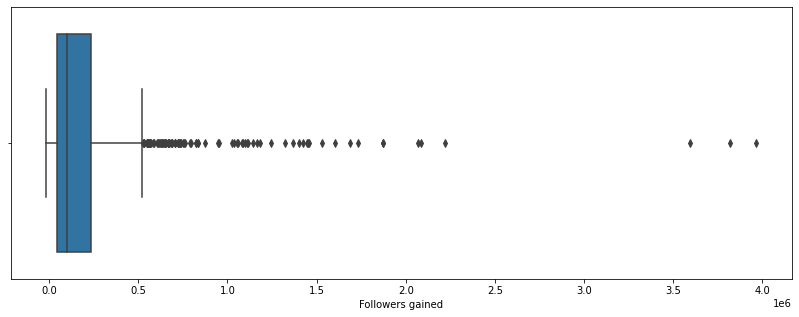

In [44]:
figure, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(ax=ax, x=data['Followers gained'])